## fitting Ks mag, Teff, Fe/H, and parallax

In [1]:
from jaxstar import mistfit
from jax import random
import arviz, corner
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
mf = mistfit.MistFit()

In [4]:
# observed Kmag, Teff, Fe/H, parallax (mas)
kmag_obs, kmag_err, teff_obs, feh_obs, parallax_obs, parallax_err\
= [ 4.033, 0.238, 6205, 0.22, 56.858, 0.12240193]
teff_err, feh_err = 100, 0.1

In [5]:
mf.set_data(['kmag', 'teff', 'feh', 'parallax'],\
            [kmag_obs, teff_obs, feh_obs, parallax_obs],\
            [kmag_err, teff_err, feh_err, parallax_err])

In [6]:
# setup HMC
ns = 20000
mf.setup_hmc(num_warmup=ns, num_samples=ns)

In [7]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=False)

sample: 100%|██████████████████████████████████████████| 40000/40000 [00:39<00:00, 1008.09it/s, 223 steps of size 5.85e-03. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      1.78      1.17      1.63      0.10      3.37    951.07      1.00
  distance      0.02      0.00      0.02      0.02      0.02   5153.38      1.00
       eep    333.30     31.37    336.80    278.79    385.65    897.24      1.00
       feh      0.19      0.10      0.19      0.04      0.35   3354.35      1.00

Number of divergences: 0


In [8]:
mcmc = mf.mcmc
samples = mf.samples

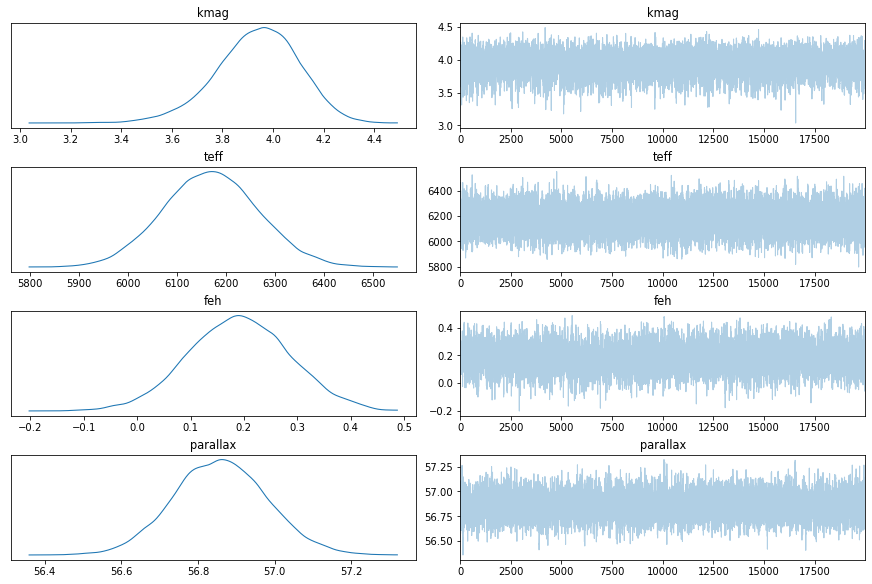

In [9]:
# trace plot
fig = arviz.plot_trace(mcmc, var_names=mf.obskeys)

In [10]:
# keys and observed values for corner plot
outkeys = mf.obskeys + ['mass', 'radius', 'age', 'eep']
obsvals = mf.obsvals + [None] * 4

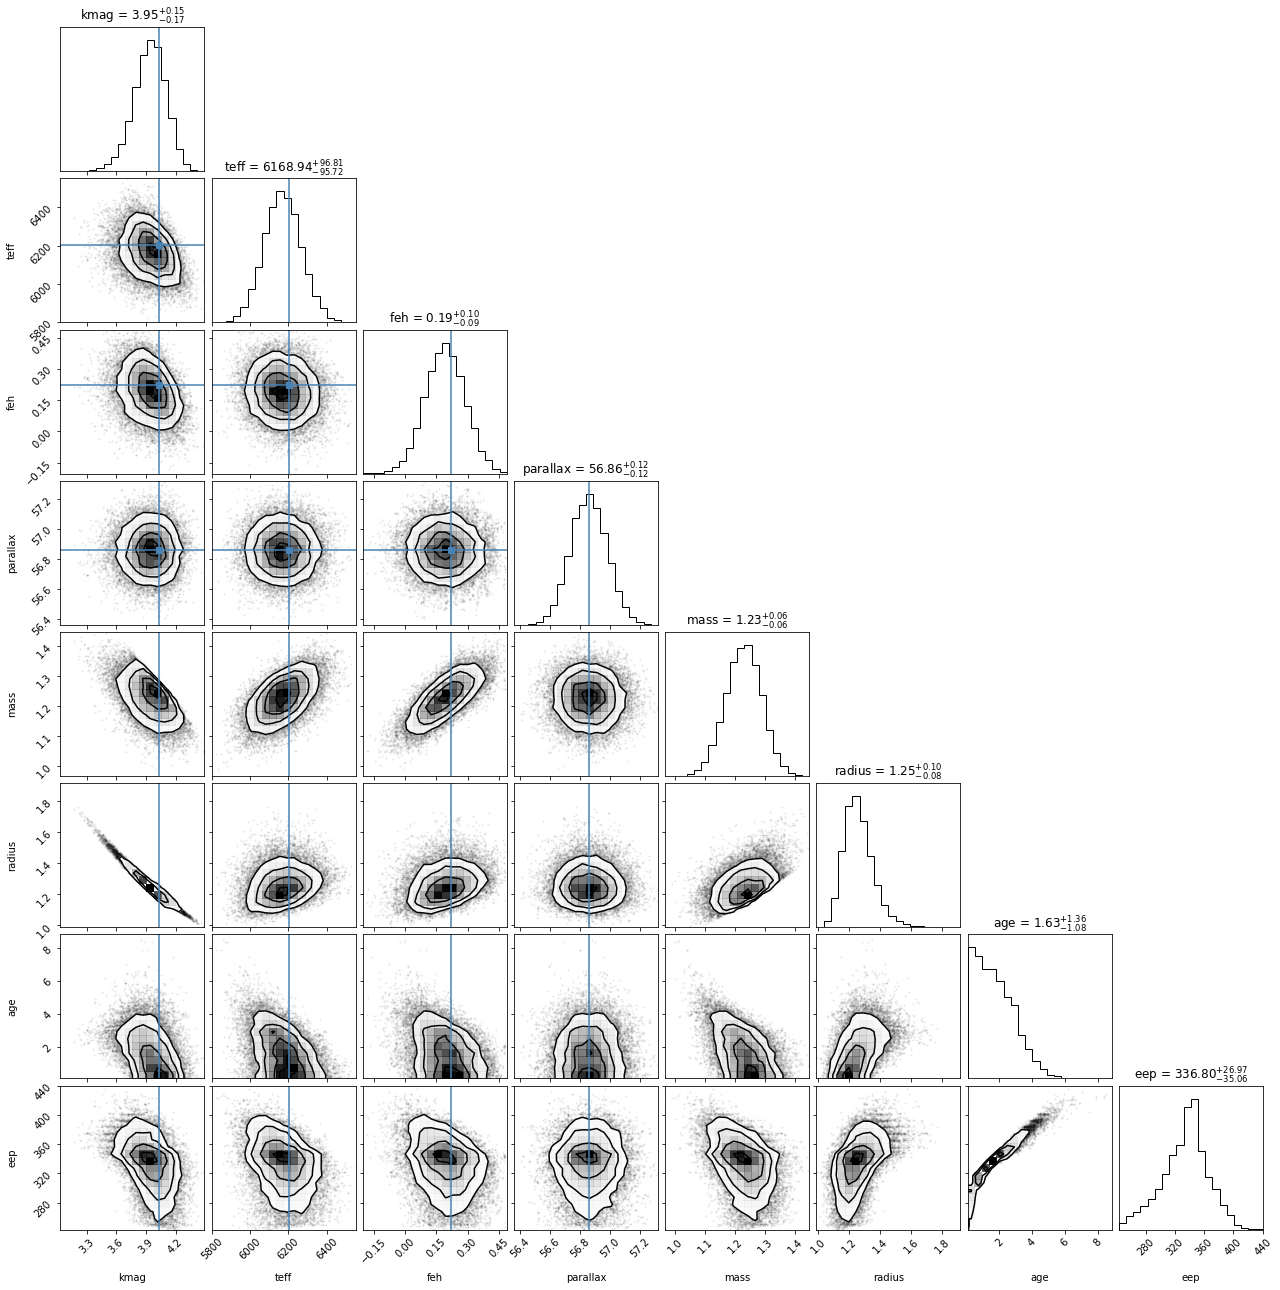

In [11]:
params = pd.DataFrame(data=dict(zip(outkeys, [samples[k] for k in outkeys])))
fig = corner.corner(params, show_titles="%.2f", truths=obsvals)

## w/ rotation period using gyrochrone in [Angus et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019AJ....158..173A/abstract)

In [12]:
mf2 = mistfit.MistFit()
mf2.set_data(['kmag', 'teff', 'feh', 'parallax'],\
            [kmag_obs, teff_obs, feh_obs, parallax_obs],\
            [kmag_err, teff_err, feh_err, parallax_err])
ns = 20000
mf2.setup_hmc(num_warmup=ns, num_samples=ns)

In [13]:
# run
rng_key = random.PRNGKey(0)
mf2.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=False, prot=3.3)

sample: 100%|████████████████████████████████████████████| 40000/40000 [00:42<00:00, 936.54it/s, 63 steps of size 6.40e-03. acc. prob=0.95]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      1.04      0.65      0.85      0.12      2.05    956.53      1.00
  distance      0.02      0.00      0.02      0.02      0.02   5211.03      1.00
       eep    316.53     21.84    316.47    283.80    353.35   1173.49      1.00
       feh      0.19      0.09      0.19      0.05      0.35   3020.63      1.00

Number of divergences: 0


In [14]:
samples2 = mf2.samples

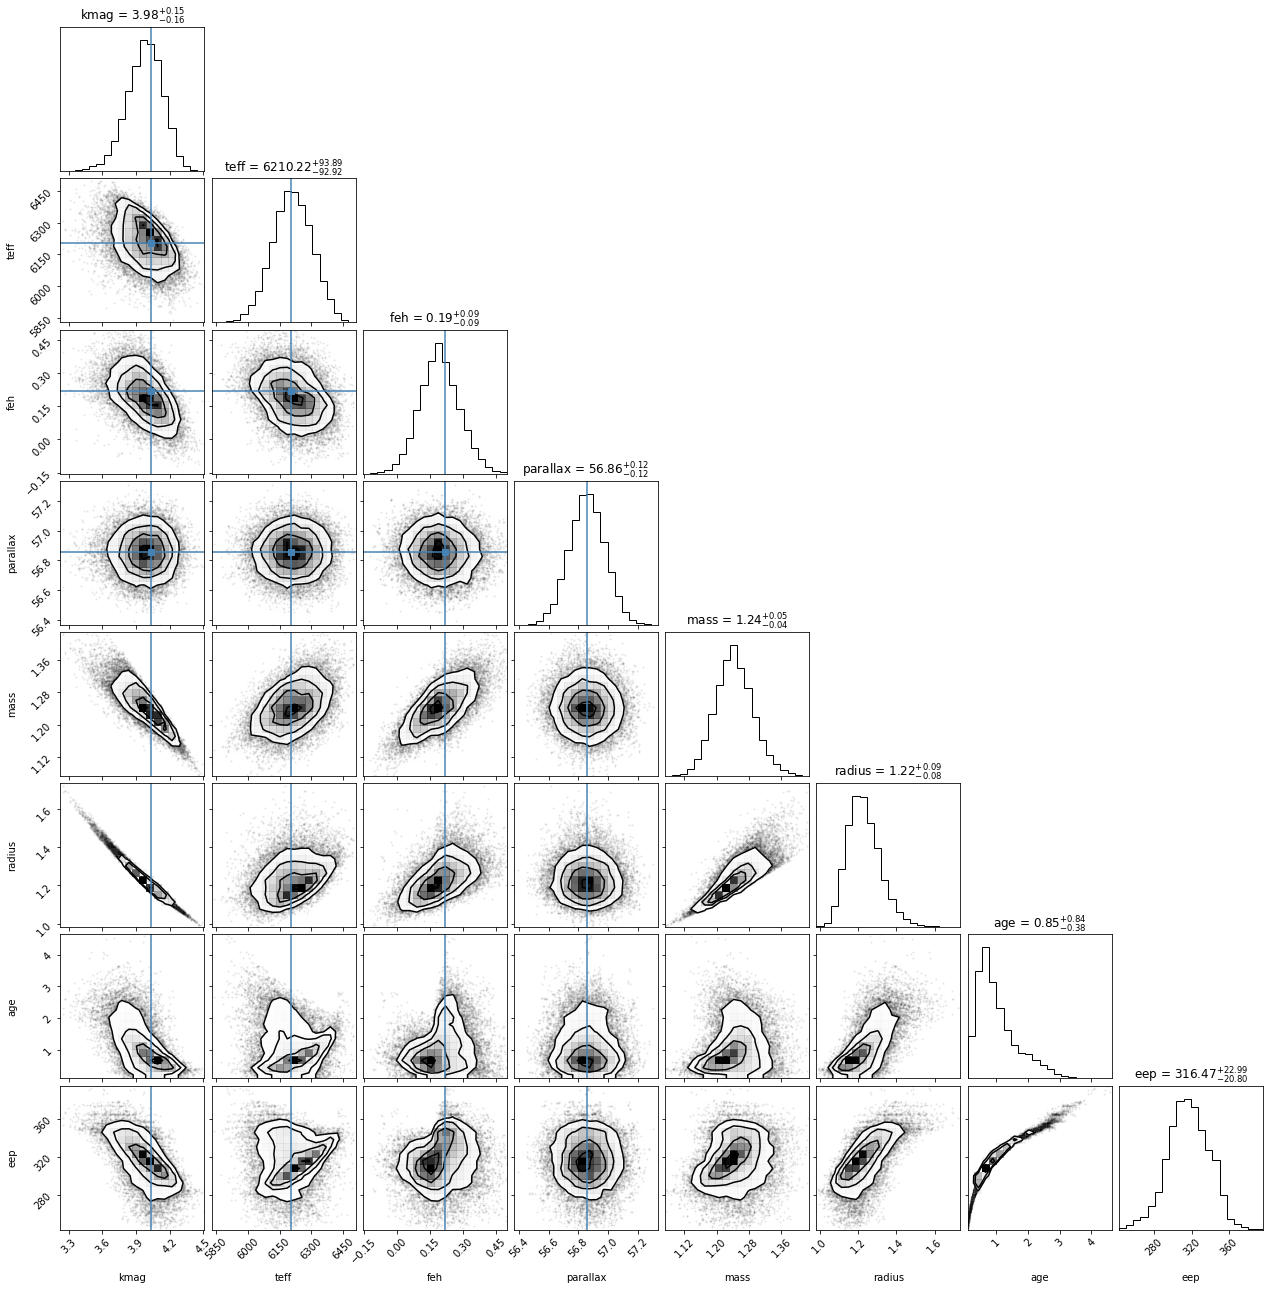

In [15]:
params = pd.DataFrame(data=dict(zip(outkeys, [samples2[k] for k in outkeys])))
fig = corner.corner(params, show_titles="%.2f", truths=obsvals)